# Examples

### Download Dataset

In [1]:
!curl -o FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72629  100 72629    0     0   101k      0 --:--:-- --:--:-- --:--:--  101k


In [2]:
import pandas as pd

### Convert Dataset to Pandas DataFrame

In [3]:
df = pd.read_csv("FuelConsumption.csv") 

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


> What is DataFrame object?

In [4]:
print(df.__doc__[:105]) # or click Control+Tab for information


    Two-dimensional size-mutable, potentially heterogeneous tabular data
    structure with labeled axes


Brief statistical information about the data

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Select fields to display and limit output to the top 3 entries

In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136


Plot the historram
* horizontal axis - feauture value
* vertical axis - number of entries with such feature value

In [7]:
import matplotlib.pyplot as plt

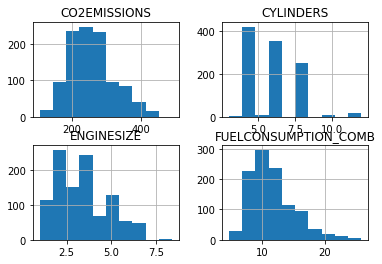

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

How does fuel consumption impact emission?

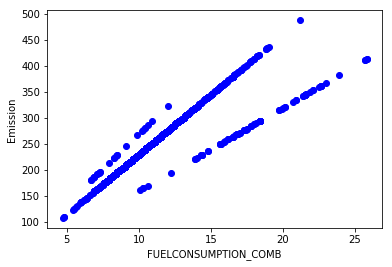

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

How does emission changes with engine size?

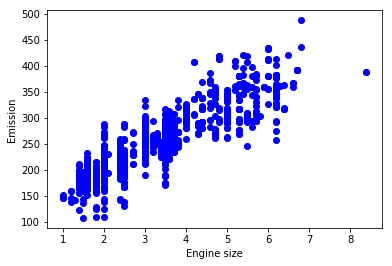

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [11]:
cdf.ENGINESIZE.mean()

3.346298031865042

# Practice

## Build graphs

In [12]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


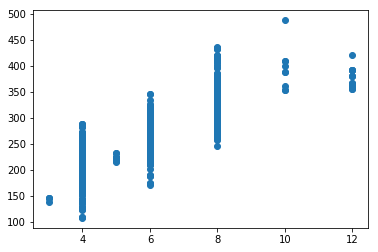

In [13]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
plt.show()

## Train and Test Dataset

In [14]:
import numpy as np
np.random.random(5) # 5 values between 0 and 1

array([0.59909331, 0.39104174, 0.75774117, 0.21787976, 0.41317567])

### What is ```np.random.random```?

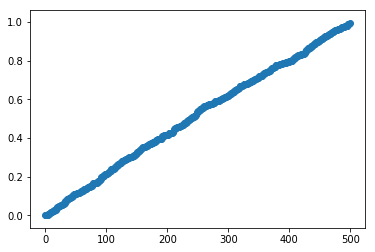

In [15]:
rand = np.array(np.random.random(500))
sort_rand = np.sort(rand)
plt.scatter(np.array(range(500)), sort_rand)

> Random variable ```np.random.random()``` is uniformely distributed between 0 and 1

### Generating Mask

In [16]:
msk = np.random.rand(len(df)) < 0.8
train_length = len(list(filter(lambda e: e == 1, msk)))
print('DF size', len(df), 'Mask size',
     'Which is actually', round(train_length/len(df)*100,2), '%')
train = cdf[msk]
test = cdf[~msk]

DF size 1067 Mask size Which is actually 80.32 %


### Select parameters

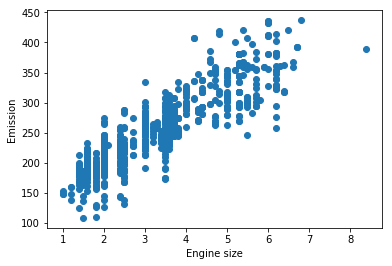

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Building a model

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_X = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_X, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

ModuleNotFoundError: No module named 'sklearn'

### Plot the line

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_X, regr.coef_[0][0]*train_X + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
regr.coef_[0][0]*4 + regr.intercept_[0]

## Result evaluation

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

In [ ]:
np.mean(np.absolute([-22,-3]))

In [ ]:
np.mean(np.array([4,6]) ** 2) == (16+36)/2

In [ ]:
r2_score([3,5] , [3.2,5.2]) # good score

In [ ]:
r2_score([3,5], [3.6,5.9]) # fine score

In [ ]:
r2_score([0,0], [1,2]) # bad score

The best is 1, the worst is $-\infty$.

In [ ]:
r2_score([3,5], [-3.6,-5.9]) # worse score

<hr>

edX IBM: ML0101EN

Machine Learning with Python: A Practical Introduction